# Patching the grids together

### grid parameters

In [1]:
# Specify the grid properties
# All
# Specify the desired resolution
degree_resolution_inverse = 4 #quarter degree grid
refine=2    # Set to 2 for supergrid
lenlon=360  # global longitude range
lon0=-300.  # Starting longitude (longitude of the Northern bipoles)
Ni = lenlon*refine*degree_resolution_inverse

#Mercator grid
phi_s_Merc, phi_n_Merc = -66.85954724706843, 64.0589597296948

#Southern grid
Nj_SO=110*refine
lat0_SO=-78.0
lenlat_SO = phi_s_Merc-lat0_SO 

#Southern cap
Nj_scap=80*refine
lon_dp=100.0   # longitude of the displaced pole 
r_dp=0.20
doughnut=0.12

#Northern bipolar cap
Nj_ncap=119*refine
lon_bp=lon0 # longitude of the displaced pole(s)
lat0_bp=phi_n_Merc 
lenlat_bp=90.0-lat0_bp


In [2]:
import ocean_grid_generator as ggg
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


## Mercator grid

Generating Mercator grid with phi range: phi_s,phi_n= [-66.85954725  64.05895973]
64.0589597296948


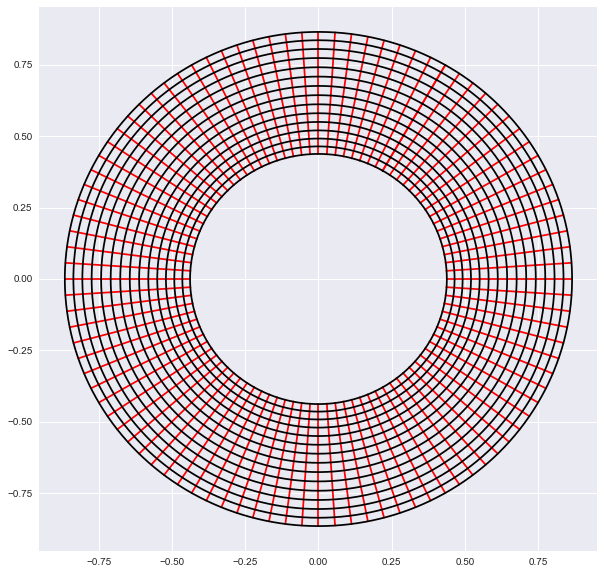

In [3]:
lamMerc,phiMerc = ggg.generate_mercator_grid(Ni,phi_s_Merc,phi_n_Merc,lon0,lenlon)    
print(phiMerc[-1,0])

ggg.plot_mesh_in_xyz(lamMerc,phiMerc, stride=30,lowerlat=30);


## Northern bipolar cap grid

Generating bipolar grid bounded at latitude  64.0589597296948
64.0589597296948


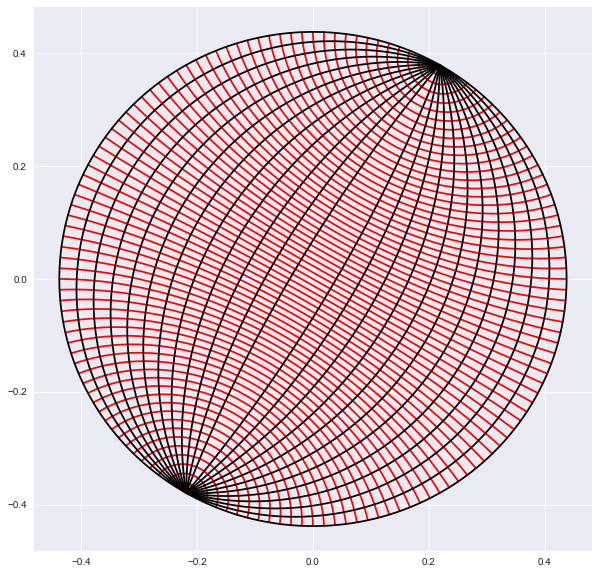

In [4]:
lamBP,phiBP = ggg.generate_bipolar_cap_grid(Ni,Nj_ncap,lat0_bp,lon_bp,lenlon)
print(phiBP[0,0])
ggg.plot_mesh_in_xyz(lamBP, phiBP, stride=20)

### visualize Northern grids together

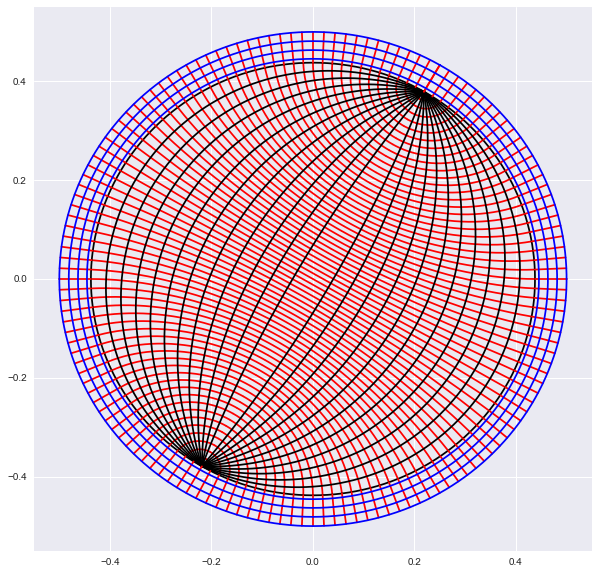

In [5]:
plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lamBP, phiBP, stride=20,newfig=False)
ggg.plot_mesh_in_xyz(lamMerc,phiMerc, phi_color='b', stride=20,lowerlat=60,newfig=False)


Note that the double line at the joint is a plotting artifact due to the setting a stride.

### bipolar grid produced by FMS/MIDAS

Generating FMS bipolar grid bounded at latitude  64.0589597296948


<Figure size 720x720 with 0 Axes>

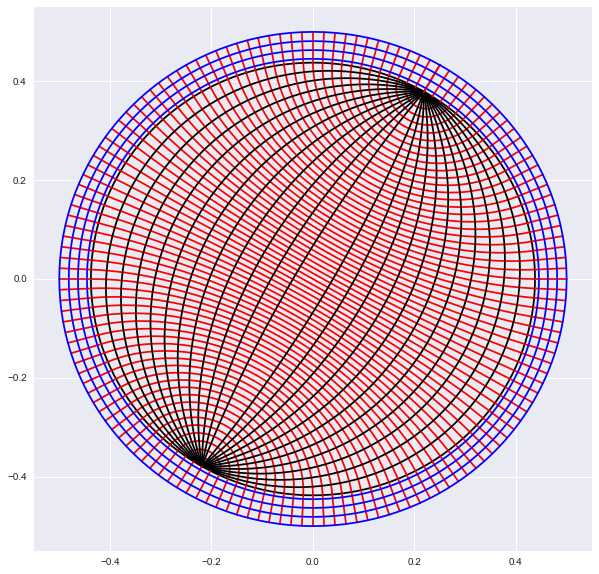

In [6]:
lams_fms, phis_fms= ggg.generate_bipolar_cap_grid_fms(Ni,Nj_ncap,lat0_bp,lon_bp,lenlon,lenlat_bp)
plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lams_fms, phis_fms, stride=20);
ggg.plot_mesh_in_xyz(lamMerc,phiMerc, phi_color='b', stride=20,lowerlat=60,newfig=False);


## Southern Ocean and Cap

Generating displaced pole grid bounded at latitude  -78.0


<Figure size 720x720 with 0 Axes>

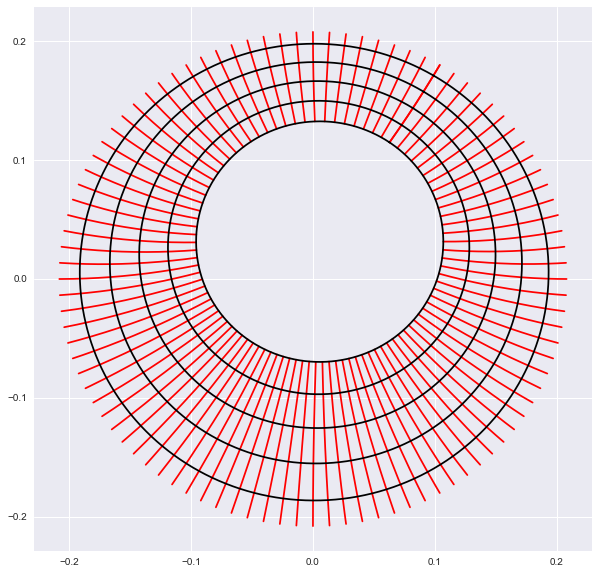

In [7]:
#Southern Ocean    
lamSO,phiSO = ggg.generate_latlon_grid(Ni,Nj_SO,lon0,lenlon,lat0_SO,lenlat_SO)

lamc_DP,phic_DP = ggg.generate_displaced_pole_grid(Ni,Nj_scap,lon0,lenlon,lon_dp,r_dp,lat0_SO,doughnut)

#plot grid
plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lamc_DP,phic_DP, stride=30)

### Mercator join with Southern ocean and Southern cap

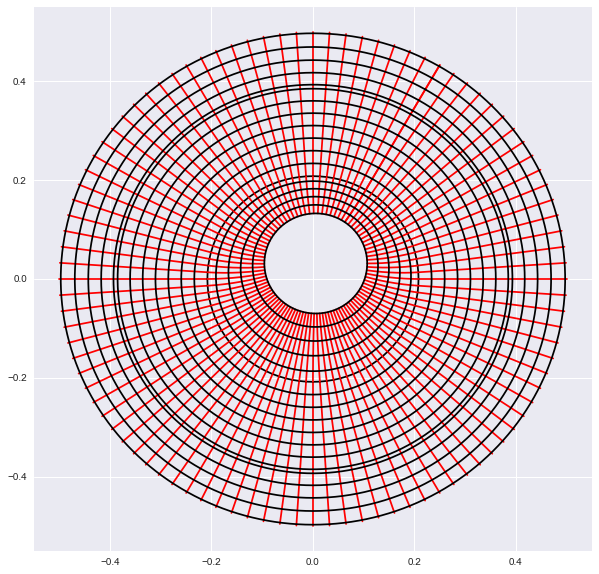

In [8]:
plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lamSO,phiSO, stride=30,newfig=False)
ggg.plot_mesh_in_xyz(lamc_DP,phic_DP, stride=30,newfig=False)
ggg.plot_mesh_in_xyz(lamMerc,phiMerc, stride=30, upperlat=-60,newfig=False)


<Figure size 720x720 with 0 Axes>

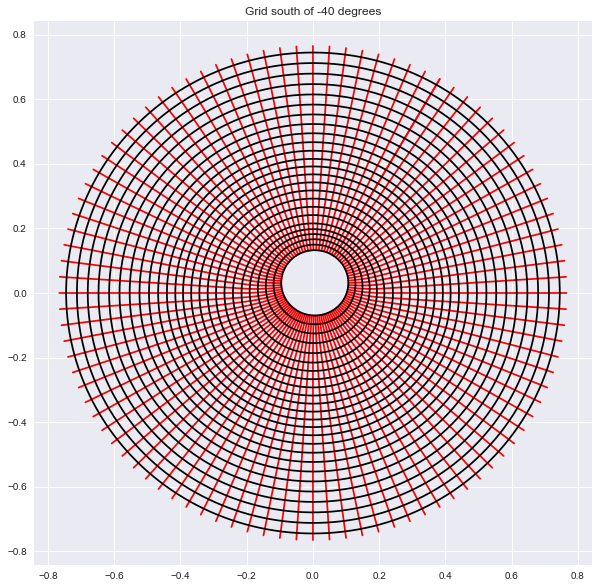

In [9]:
lam1=np.concatenate((lamc_DP,lamSO),axis=0)
phi1=np.concatenate((phic_DP,phiSO),axis=0)

lam2=np.concatenate((lam1,lamMerc),axis=0)
phi2=np.concatenate((phi1,phiMerc),axis=0)


plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lam2,phi2, stride=30,upperlat=-40, title="Grid south of -40 degrees")


<Figure size 720x720 with 0 Axes>

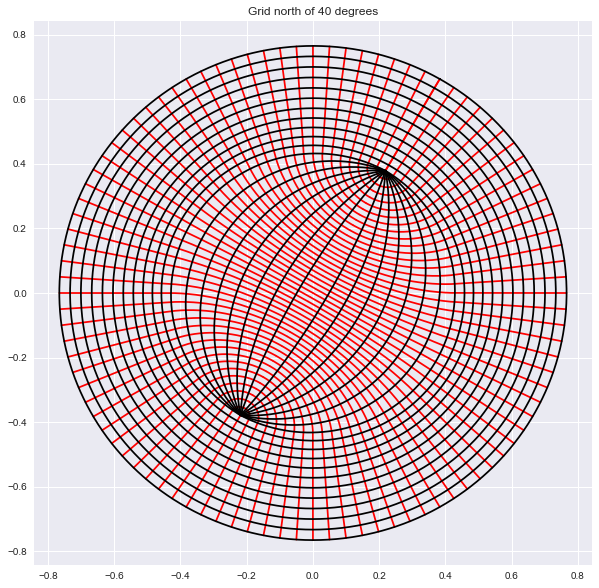

In [10]:
lam3=np.concatenate((lam2,lamBP),axis=0)
phi3=np.concatenate((phi2,phiBP),axis=0)


plt.figure(figsize=(10,10))
ggg.plot_mesh_in_xyz(lam3,phi3, stride=30,lowerlat=40, title="Grid north of 40 degrees")


In [11]:
#generate the metrics
dx3,dy3,area3,angle3 = ggg.generate_grid_metrics(lam3,phi3,axis_units='degrees')

#write the grid file
ggg.write_nc(lam3,phi3,dx3,dy3,area3,angle3,axis_units='degrees',fnam='tripolar_0.25.nc')
